## Финальная работа. 


##### 1. Взять набор данных исходя из ваших интересов. Загружаем данные и преобразуем в pandas DataFrame

In [1]:
import pyarrow.parquet as pq
import pandas as pd

# Список файлов Parquet для загрузки
file_list = ['train_data.pq' ] # , 'train_data_2.pq' , 'train_data_3.pq', 'train_data_4.pq', 'train_data_5.pq','train_data_6.pq', 'train_data_7.pq',  'train_data_8.pq'  , 'train_data_9.pq', 'train_data_10.pq', 'train_data_11.pq'
file_list_test = ['test_data.pq']

# Чтение файла Parquet
dataset = pq.ParquetDataset(file_list)
# dataset = dd.read_parquet(file_list).compute() 
dataset_test = pq.ParquetDataset(file_list_test
                                )
# Прочитать все данные из Parquet файлов в виде Table
table = dataset.read()
table_test = dataset_test.read()

# Конвертировать Table в pandas DataFrame
df = table.to_pandas()
df_test = table_test.to_pandas()

df.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,250000,1,8,7,7,2,4,9,5,2,...,3,3,3,4,1,3,4,1,0,0
1,250000,2,14,8,12,10,6,3,12,6,...,3,3,3,4,1,3,4,1,0,0
2,250000,3,10,4,8,11,6,13,5,2,...,3,3,3,4,1,3,4,1,0,0
3,250000,4,13,12,8,6,13,5,12,2,...,3,3,3,4,1,3,4,1,0,0
4,250000,5,6,12,4,14,1,7,4,2,...,3,3,3,4,1,3,1,1,1,0


##### 2. Описать колонки, какие характеристики.

In [2]:
print(df)
df.head()
df_test.head()

             id  rn  pre_since_opened  pre_since_confirmed  pre_pterm  \
0        250000   1                 8                    7          7   
1        250000   2                14                    8         12   
2        250000   3                10                    4          8   
3        250000   4                13                   12          8   
4        250000   5                 6                   12          4   
...         ...  ..               ...                  ...        ...   
2107300  499999   8                 6                   11         14   
2107301  499999   9                11                   13         17   
2107302  499999  10                 1                    2         11   
2107303  499999  11                12                   10          1   
2107304  499999  12                12                    2          6   

         pre_fterm  pre_till_pclose  pre_till_fclose  pre_loans_credit_limit  \
0                2                4        

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,3250000,1,8,7,16,9,9,1,12,2,...,3,3,3,4,1,3,4,1,0,0
1,3250000,2,15,7,2,12,6,1,19,2,...,3,3,3,4,1,3,4,1,0,0
2,3250000,3,15,3,14,7,5,10,8,2,...,0,1,0,2,1,3,4,1,0,0
3,3250000,4,15,10,4,8,1,11,6,2,...,0,0,0,2,1,2,3,1,1,1
4,3250000,5,14,12,9,12,6,13,13,2,...,3,3,3,4,1,3,4,1,0,0


In [2]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Для связи целевой переменной с данными по ID необходимо обхеденить разрозненные данные
pd.set_option('display.max_columns', None)
df_score_train = pd.read_csv('train_target.csv')
df_score_test = pd.read_csv('test_target.csv')

In [4]:
# Объединение таблиц по индексу
joined_df_test = df_test.join(df_score_test, on='id', how='inner', lsuffix='_df') # inner - внутреннее объединение
print(joined_df_test)

Empty DataFrame
Columns: [id_df, rn, pre_since_opened, pre_since_confirmed, pre_pterm, pre_fterm, pre_till_pclose, pre_till_fclose, pre_loans_credit_limit, pre_loans_next_pay_summ, pre_loans_outstanding, pre_loans_total_overdue, pre_loans_max_overdue_sum, pre_loans_credit_cost_rate, pre_loans5, pre_loans530, pre_loans3060, pre_loans6090, pre_loans90, is_zero_loans5, is_zero_loans530, is_zero_loans3060, is_zero_loans6090, is_zero_loans90, pre_util, pre_over2limit, pre_maxover2limit, is_zero_util, is_zero_over2limit, is_zero_maxover2limit, enc_paym_0, enc_paym_1, enc_paym_2, enc_paym_3, enc_paym_4, enc_paym_5, enc_paym_6, enc_paym_7, enc_paym_8, enc_paym_9, enc_paym_10, enc_paym_11, enc_paym_12, enc_paym_13, enc_paym_14, enc_paym_15, enc_paym_16, enc_paym_17, enc_paym_18, enc_paym_19, enc_paym_20, enc_paym_21, enc_paym_22, enc_paym_23, enc_paym_24, enc_loans_account_holder_type, enc_loans_credit_status, enc_loans_credit_type, enc_loans_account_cur, pclose_flag, fclose_flag, id]
Index: []

In [3]:
# Объединение таблиц по индексу
joined_df = df.join(df_score_train, on='id', how='inner', lsuffix='_df') # inner - внутреннее объединение
print(joined_df)

          id_df  rn  pre_since_opened  pre_since_confirmed  pre_pterm  \
0        250000   1                 8                    7          7   
1        250000   2                14                    8         12   
2        250000   3                10                    4          8   
3        250000   4                13                   12          8   
4        250000   5                 6                   12          4   
...         ...  ..               ...                  ...        ...   
2107300  499999   8                 6                   11         14   
2107301  499999   9                11                   13         17   
2107302  499999  10                 1                    2         11   
2107303  499999  11                12                   10          1   
2107304  499999  12                12                    2          6   

         pre_fterm  pre_till_pclose  pre_till_fclose  pre_loans_credit_limit  \
0                2                4        

In [6]:
joined_df.head(100)

,id_df,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,id,flag
0,250000,1,8,7,7,2,4,9,5,2,3,0,3,4,6,16,5,4,8,1,0,1,0,0,16,2,8,1,1,0,3,3,3,2,1,1,0,0,0,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,250000,0
1,250000,2,14,8,12,10,6,3,12,6,3,0,2,4,6,16,5,4,8,1,1,0,0,1,16,2,17,1,1,1,3,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,4,3,3,3,4,1,3,4,1,0,0,250000,0
2,250000,3,10,4,8,11,6,13,5,2,3,0,2,4,6,16,5,4,8,1,0,0,1,1,16,2,17,1,1,1,0,2,1,0,0,0,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,250000,0
3,250000,4,13,12,8,6,13,5,12,2,3,0,2,10,6,16,5,4,8,1,0,0,0,0,16,2,17,1,1,1,0,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,250000,0
4,250000,5,6,12,4,14,1,7,4,2,3,0,2,4,6,16,5,4,8,1,1,1,1,0,9,5,4,0,0,0,0,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,1,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,250014,7,6,2,0,8,14,11,11,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2,3,1,0,1,250014,0
96,250014,8,11,17,8,11,15,14,4,2,3,0,2,0,6,16,5,4,8,1,0,1,1,1,9,5,4,0,0,0,0,0,0,1,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,3,1,0,0,250014,0
97,250014,9,1,9,4,8,1,11,15,5,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,1,1,250014,0
98,250014,10,12,10,16,8,12,2,14,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0,250014,0


In [4]:
df = joined_df

In [8]:
df.shape

(2107305, 63)

In [9]:
df.describe().round(2)

,id_df,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,id,flag
count,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.0,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.0,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.0,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00,2107305.00
mean,376296.80,6.82,9.27,8.45,8.31,8.29,7.08,8.38,9.72,2.40,3.01,0.0,2.01,4.65,5.98,15.88,5.00,4.00,8.00,0.9,0.84,0.96,0.98,0.98,13.86,2.18,15.67,0.70,0.94,0.85,0.18,0.38,0.52,0.65,0.79,0.92,1.11,1.25,1.37,1.48,1.63,2.75,1.90,2.0,2.05,2.09,2.13,2.17,2.22,2.25,3.28,2.31,2.34,2.38,3.56,1.03,2.69,3.33,1.00,0.16,0.24,376296.80,0.03
std,72011.99,5.28,5.72,4.78,5.29,4.43,5.18,4.22,5.80,1.37,0.70,0.0,0.31,3.13,0.38,1.17,0.06,0.02,0.09,0.3,0.36,0.20,0.14,0.14,4.40,0.82,4.03,0.46,0.24,0.36,0.64,0.93,1.08,1.19,1.28,1.35,1.42,1.45,1.47,1.48,1.47,1.46,1.43,1.4,1.38,1.36,1.34,1.33,1.30,1.28,1.27,1.25,1.23,1.20,1.06,0.28,0.49,1.08,0.05,0.37,0.42,72011.99,0.17
min,250000.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,250000.00,0.00
25%,314099.00,3.00,5.00,5.00,4.00,6.00,2.00,5.00,5.00,2.00,3.00,0.0,2.00,2.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,15.00,2.00,17.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,4.00,3.00,3.00,3.00,4.00,1.00,2.00,3.00,1.00,0.00,0.00,314099.00,0.00
50%,376993.00,5.00,9.00,9.00,8.00,8.00,7.00,10.00,10.00,2.00,3.00,0.0,2.00,4.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,4.00,3.00,3.0,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,4.00,1.00,0.00,0.00,376993.00,0.00
75%,438725.00,10.00,14.00,12.00,13.00,11.00,12.00,11.00,15.00,2.00,3.00,0.0,2.00,6.00,6.00,16.00,5.00,4.00,8.00,1.0,1.00,1.00,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.0,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,4.00,1.00,0.00,0.00,438725.00,0.00
max,499999.00,50.00,19.00,17.00,17.00,16.00,16.00,15.00,19.00,6.00,5.00,0.0,3.00,13.00,16.00,19.00,9.00,4.00,19.00,1.0,1.00,1.00,1.00,1.00,19.00,19.00,19.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.0,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,6.00,6.00,5.00,3.00,1.00,1.00,499999.00,1.00


##### 3. Провести анализ EDA.

In [10]:
# Проверка наличия пропущенных значений
print(df.isnull().sum())

id_df                    0
rn                       0
pre_since_opened         0
pre_since_confirmed      0
pre_pterm                0
                        ..
enc_loans_account_cur    0
pclose_flag              0
fclose_flag              0
id                       0
flag                     0
Length: 63, dtype: int64


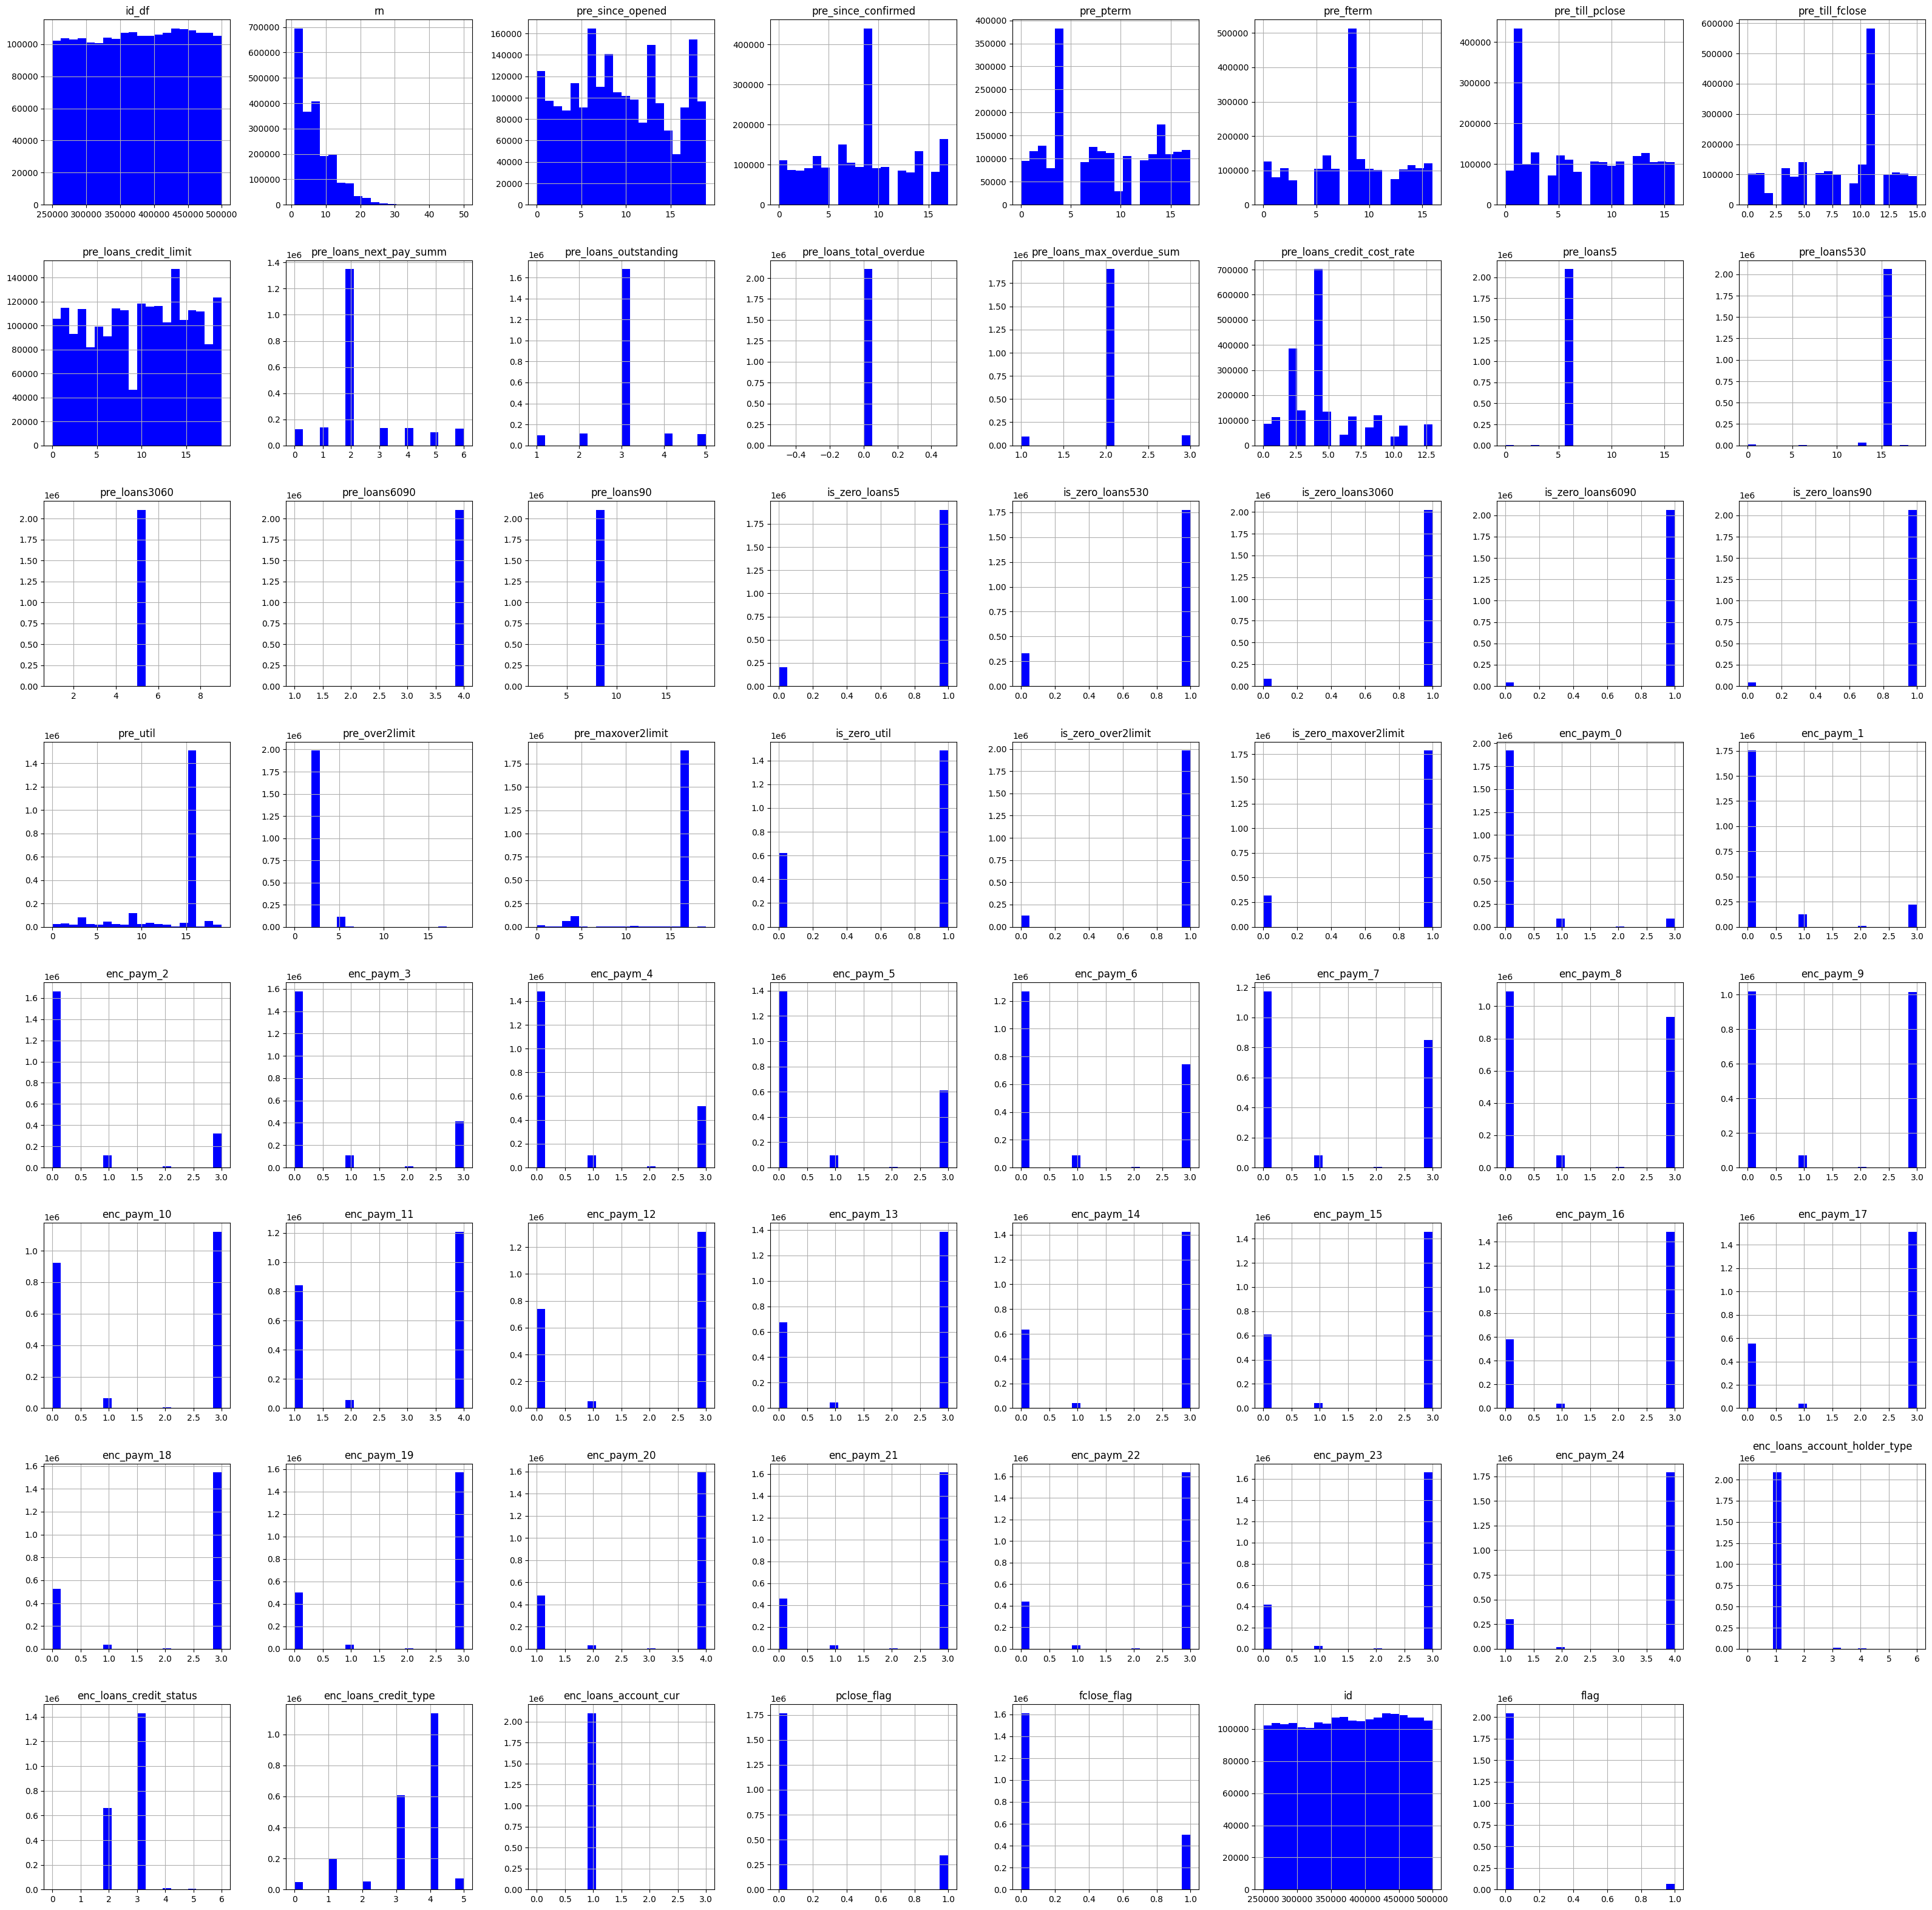

In [11]:
# Визуализация распределения данных
df.hist(bins=20, figsize=(40,40), color='b')
plt.show()

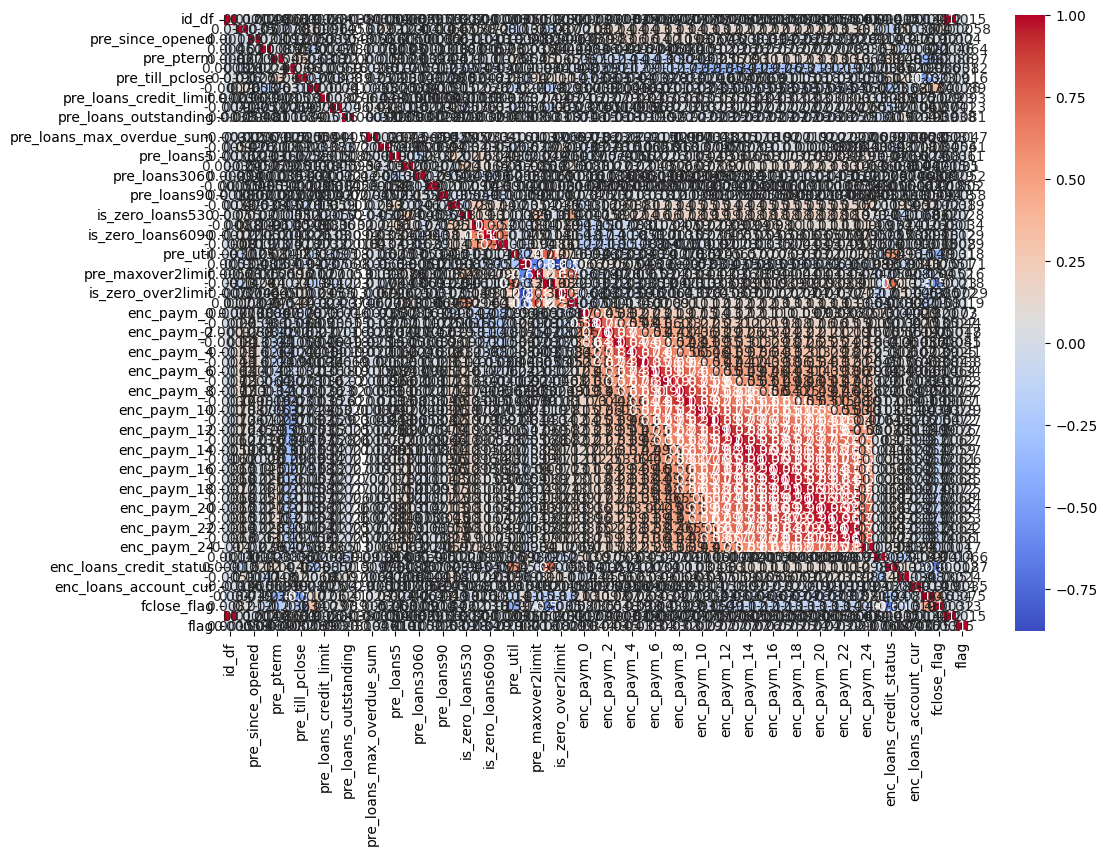

In [12]:
# Исследование корреляции между признаками
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
# Удалить строки с выбросами
df = df[(df['enc_paym_24'] < df['enc_paym_24'].quantile(0.99)) &
        (df['enc_paym_22'] < df['enc_paym_22'].quantile(0.99)) &
        (df['enc_paym_20'] < df['enc_paym_20'].quantile(0.99)) &
        (df['enc_paym_18'] < df['enc_paym_18'].quantile(0.99)) &
        (df['enc_paym_16'] < df['enc_paym_16'].quantile(0.99)) &
        (df['enc_paym_14'] < df['enc_paym_14'].quantile(0.99))]

df.head()

,id_df,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,id,flag
5,250000,6,18,10,0,8,8,11,7,2,5,0,2,4,6,16,5,4,8,0,1,1,1,1,11,2,17,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2,3,1,0,1,250000,0
13,250001,7,10,14,11,13,16,12,15,2,3,0,2,4,6,16,5,4,8,1,0,1,1,1,16,2,17,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,3,2,1,0,0,250001,0
14,250001,8,18,5,6,1,0,4,2,5,1,0,2,4,6,16,5,4,8,1,0,1,1,1,10,2,17,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,2,1,2,0,1,0,0,250001,0
19,250002,2,0,5,0,7,2,6,14,2,3,0,2,2,6,0,5,4,8,1,0,0,0,0,9,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,3,3,1,0,0,250002,0
21,250003,1,8,6,6,1,8,8,15,3,1,0,2,2,6,16,5,4,8,1,1,1,1,1,19,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2,3,1,0,0,250003,0


Групповой анализ (group analysis) - это техника анализа данных, при которой данные группируются по одному или нескольким признакам, а затем вычисляются различные статистические показатели (например, количество, среднее, медиана и т.д.) для каждой группы. Такой анализ помогает выявить закономерности и структуру данных.

In [14]:
# Групповой анализ
for col in df.columns:
    print(f"Анализ столбца '{col}':")
    print(df.groupby(col).size())
    print()

Анализ столбца 'id_df':
id_df
250000    1
250001    2
250002    1
250003    1
250005    4
         ..
499994    3
499995    1
499996    2
499997    4
499999    1
Length: 143701, dtype: int64

Анализ столбца 'rn':
rn
1     41018
2     41562
3     38518
4     33997
5     29450
6     24945
7     21200
8     17545
9     14422
10    11719
11     9336
12     7397
13     5875
14     4374
15     3401
16     2396
17     1807
18     1294
19      861
20      541
21      410
22      242
23      148
24       92
25       43
26       35
27       13
28       11
29        3
30        2
dtype: int64

Анализ столбца 'pre_since_opened':
pre_since_opened
0     32095
1         6
2        12
3      8084
4     26017
5     19207
6     41639
7         4
8     30529
9         4
10    25093
11        3
12        1
13    34678
14    17975
15    13291
16     8198
17    17798
18    38021
19        2
dtype: int64

Анализ столбца 'pre_since_confirmed':
pre_since_confirmed
0     30211
1     15986
2     24401
3     1736

In [6]:
df = df.drop(['pre_loans_total_overdue', 'id', 'id_df'], axis=1)

In [16]:
df.describe().round(2)

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
count,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.0,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00,312657.00
mean,5.53,9.56,8.03,7.48,9.53,7.77,8.78,9.27,2.19,3.03,2.01,4.34,5.87,15.67,5.00,4.00,8.00,0.76,0.78,0.9,0.96,0.97,12.97,2.37,15.37,0.59,0.88,0.85,0.08,0.11,0.11,0.11,0.11,0.11,0.10,0.10,0.10,0.10,0.09,1.09,0.09,0.08,0.08,0.07,0.07,0.07,0.07,0.07,1.07,0.07,0.07,0.07,1.06,1.04,2.57,3.12,1.01,0.09,0.35,0.02
std,4.02,5.74,5.43,6.12,4.51,5.42,4.08,5.75,0.97,0.80,0.22,2.89,0.87,1.95,0.11,0.02,0.05,0.43,0.41,0.3,0.20,0.18,4.81,1.11,4.31,0.49,0.33,0.36,0.34,0.42,0.42,0.41,0.40,0.39,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.31,0.29,0.28,0.28,0.28,0.27,0.28,0.27,0.27,0.26,0.26,0.25,0.32,0.53,1.01,0.08,0.29,0.48,0.15
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.00,1.00,8.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,5.00,3.00,1.00,8.00,2.00,6.00,4.00,2.00,3.00,2.00,2.00,6.00,16.00,5.00,4.00,8.00,1.00,1.00,1.0,1.00,1.00,9.00,2.00,17.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,2.00,3.00,1.00,0.00,0.00,0.00
50%,5.00,8.00,8.00,6.00,8.00,8.00,11.00,10.00,2.00,3.00,2.00,4.00,6.00,16.00,5.00,4.00,8.00,1.00,1.00,1.0,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,3.00,3.00,1.00,0.00,0.00,0.00
75%,8.00,14.00,13.00,14.00,14.00,13.00,11.00,14.00,2.00,3.00,2.00,4.00,6.00,16.00,5.00,4.00,8.00,1.00,1.00,1.0,1.00,1.00,16.00,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,3.00,4.00,1.00,0.00,1.00,0.00
max,30.00,19.00,17.00,17.00,16.00,16.00,15.00,19.00,6.00,5.00,3.00,13.00,16.00,18.00,9.00,4.00,14.00,1.00,1.00,1.0,1.00,1.00,19.00,19.00,19.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,3.00,3.00,6.00,6.00,5.00,3.00,1.00,1.00,1.00


In [17]:
df.dtypes

rn                               int64
pre_since_opened                 int64
pre_since_confirmed              int64
pre_pterm                        int64
pre_fterm                        int64
pre_till_pclose                  int64
pre_till_fclose                  int64
pre_loans_credit_limit           int64
pre_loans_next_pay_summ          int64
pre_loans_outstanding            int64
pre_loans_max_overdue_sum        int64
pre_loans_credit_cost_rate       int64
pre_loans5                       int64
pre_loans530                     int64
pre_loans3060                    int64
pre_loans6090                    int64
pre_loans90                      int64
is_zero_loans5                   int64
is_zero_loans530                 int64
is_zero_loans3060                int64
is_zero_loans6090                int64
is_zero_loans90                  int64
pre_util                         int64
pre_over2limit                   int64
pre_maxover2limit                int64
is_zero_util             

In [18]:
df.isnull().sum()

rn                               0
pre_since_opened                 0
pre_since_confirmed              0
pre_pterm                        0
pre_fterm                        0
pre_till_pclose                  0
pre_till_fclose                  0
pre_loans_credit_limit           0
pre_loans_next_pay_summ          0
pre_loans_outstanding            0
pre_loans_max_overdue_sum        0
pre_loans_credit_cost_rate       0
pre_loans5                       0
pre_loans530                     0
pre_loans3060                    0
pre_loans6090                    0
pre_loans90                      0
is_zero_loans5                   0
is_zero_loans530                 0
is_zero_loans3060                0
is_zero_loans6090                0
is_zero_loans90                  0
pre_util                         0
pre_over2limit                   0
pre_maxover2limit                0
is_zero_util                     0
is_zero_over2limit               0
is_zero_maxover2limit            0
enc_paym_0          

### Визуализация (Charts)

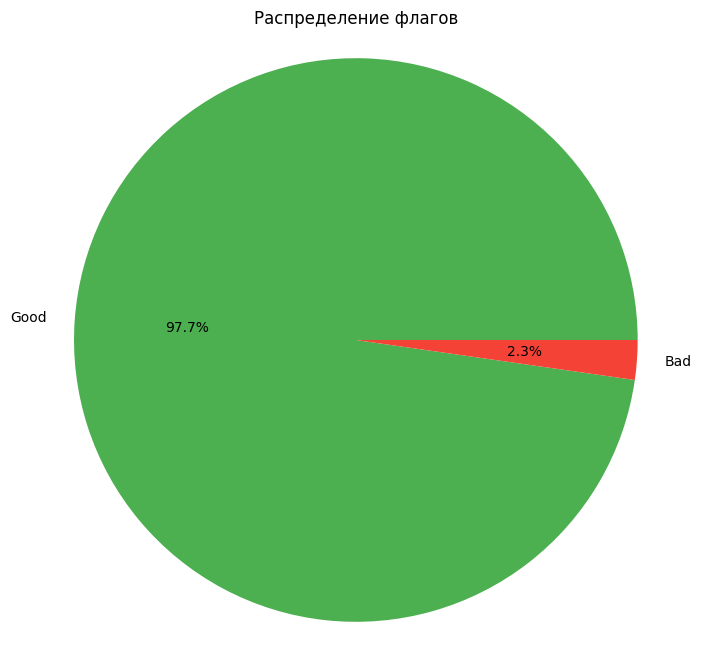

In [19]:
import matplotlib.pyplot as plt

values = df['flag'].value_counts()
labels = ['Good', 'Bad']

# Определяем цвета
colors = ['#4CAF50', '#F44336']  # Зеленый и красный цвета

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Распределение флагов')
plt.axis('equal')  # Круговая диаграмма
plt.show()

##### 4. Провести предварительную обработку данных (сделать данные понятными для модели машинного обучения: заполнить пропущенные значения, заменить категориальные признаки и т.д.)

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [7]:
from imblearn.over_sampling import RandomOverSampler
X=df.drop(columns=['flag'])
y=df['flag']
# Применение перевзвешивания классов
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

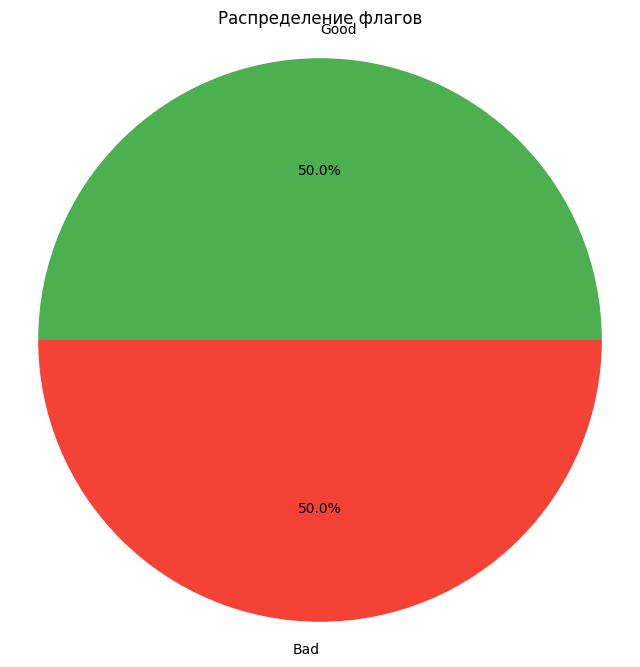

In [22]:
values = y.value_counts()
labels = ['Good', 'Bad']

# Определяем цвета
colors = ['#4CAF50', '#F44336']  # Зеленый и красный цвета

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Распределение флагов')
plt.axis('equal')  # Круговая диаграмма
plt.show()

In [23]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

rn                               0
pre_since_opened                 0
pre_since_confirmed              0
pre_pterm                        0
pre_fterm                        0
pre_till_pclose                  0
pre_till_fclose                  0
pre_loans_credit_limit           0
pre_loans_next_pay_summ          0
pre_loans_outstanding            0
pre_loans_max_overdue_sum        0
pre_loans_credit_cost_rate       0
pre_loans5                       0
pre_loans530                     0
pre_loans3060                    0
pre_loans6090                    0
pre_loans90                      0
is_zero_loans5                   0
is_zero_loans530                 0
is_zero_loans3060                0
is_zero_loans6090                0
is_zero_loans90                  0
pre_util                         0
pre_over2limit                   0
pre_maxover2limit                0
is_zero_util                     0
is_zero_over2limit               0
is_zero_maxover2limit            0
enc_paym_0          

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Заполнение пропущенных значений
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [9]:
# Обработка категориальных признаков
# Выделяем столбцы с типом object
object_cols = df.select_dtypes(include=['object']).columns

# Применяем LabelEncoder к столбцам с типом object
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


#### 5. Решить задачу классификации или регрессии на выбор при помощи 5-ти подходов  ML, моделирование

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Масштабирование числовых признаков:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# 1. Дерево решений Decision Tree

In [23]:
import gc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
model = DecisionTreeClassifier(max_depth=100, min_samples_split=5, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()


Model: DecisionTreeClassifier
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98



In [31]:
# 2. Случайный лес Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: RandomForestClassifier
Accuracy: 0.65
Precision: 0.70
Recall: 0.51
F1-score: 0.59



In [33]:
# 3. Градиентный бустинг (Gradient Boosting Classifier)

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: RandomForestClassifier
Accuracy: 0.65
Precision: 0.70
Recall: 0.52
F1-score: 0.60



In [35]:
# 4. Логистическая регрессия Logistic Regresion

In [36]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', class_weight='balanced')
# model = LogisticRegression(C=1.0, solver='lbfgs', class_weight='balanced')
model = LogisticRegression(C=0.5, solver='lbfgs', class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()


Model: LogisticRegression
Accuracy: 0.60
Precision: 0.62
Recall: 0.52
F1-score: 0.57



In [37]:
# 5. XGBoost Classifier

In [38]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: XGBClassifier
Accuracy: 0.66
Precision: 0.68
Recall: 0.58
F1-score: 0.63



In [39]:
# 6. LightGBM Classifier

In [40]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=100, max_depth=10, min_child_samples=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

D:\GItHUB\DS_Project\venv\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 244243, number of negative: 244662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 488905, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499571 -> initscore=-0.001714
[LightGBM] [Info] Start training from score -0.001714
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you

In [41]:
# 7. CatBoost Classifier

In [42]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

0:	learn: 0.6882587	total: 220ms	remaining: 1m 49s
1:	learn: 0.6842937	total: 267ms	remaining: 1m 6s
2:	learn: 0.6808908	total: 308ms	remaining: 51s
3:	learn: 0.6782184	total: 353ms	remaining: 43.7s
4:	learn: 0.6760341	total: 395ms	remaining: 39.1s
5:	learn: 0.6741648	total: 438ms	remaining: 36s
6:	learn: 0.6725824	total: 480ms	remaining: 33.8s
7:	learn: 0.6711968	total: 522ms	remaining: 32.1s
8:	learn: 0.6699518	total: 567ms	remaining: 30.9s
9:	learn: 0.6688115	total: 612ms	remaining: 30s
10:	learn: 0.6679158	total: 655ms	remaining: 29.1s
11:	learn: 0.6670895	total: 696ms	remaining: 28.3s
12:	learn: 0.6663407	total: 739ms	remaining: 27.7s
13:	learn: 0.6655819	total: 782ms	remaining: 27.2s
14:	learn: 0.6650067	total: 830ms	remaining: 26.8s
15:	learn: 0.6644010	total: 875ms	remaining: 26.5s
16:	learn: 0.6638440	total: 919ms	remaining: 26.1s
17:	learn: 0.6633559	total: 964ms	remaining: 25.8s
18:	learn: 0.6628627	total: 1.01s	remaining: 25.6s
19:	learn: 0.6623933	total: 1.06s	remaining: 2

In [43]:
# 8. K-Nearest Neighbors (KNeighborsClassifier)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(
#     n_neighbors=5,  # Количество ближайших соседей, которые будут учитываться
#     weights='uniform',  # Способ взвешивания расстояний до соседей
#     algorithm='auto',  # Алгоритм поиска ближайших соседей
#     leaf_size=30,  # Размер листа дерева для построения структуры данных
#     p=2,  # Параметр Минковского, используемый для вычисления расстояний
#     metric='minkowski',  # Метрика для вычисления расстояний
#     n_jobs=-1  # Использование всех доступных ядер процессора для параллелизации
# )
model = KNeighborsClassifier(n_neighbors=3, 
                           algorithm='kd_tree', 
                           leaf_size=40, 
                           n_jobs=-1, 
                           weights='uniform', 
                           p=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: KNeighborsClassifier
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1-score: 0.97



In [45]:
# 9. Наивный Байесовский классификатор (GaussianNB)

In [46]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing=1e-6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score=accuracy_score(y_test, y_pred ) # y_pred=pridictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: GaussianNB
Accuracy: 0.57
Precision: 0.67
Recall: 0.30
F1-score: 0.42



In [49]:
# 10. Ансамбль с бэггингом (BaggingClassifier)

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=5)
model = BaggingClassifier(base_estimator, n_estimators=100, max_samples=0.8, max_features=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: BaggingClassifier
Accuracy: 0.60
Precision: 0.62
Recall: 0.53
F1-score: 0.57



In [51]:
# 11. Нейронные сети (MLPClassifier)

In [52]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', learning_rate='constant', learning_rate_init=0.01, alpha=1e-3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print()

Model: MLPClassifier
Accuracy: 0.60
Precision: 0.59
Recall: 0.68
F1-score: 0.63



##### 6. Решить задачу поиска аномалий.

In [45]:
X = pd.DataFrame(X)
X = X.sample(n=500000, random_state=42)

In [16]:
X = X.values
X = X.reshape(-1, 1)
print(X.shape)

(500000, 1)


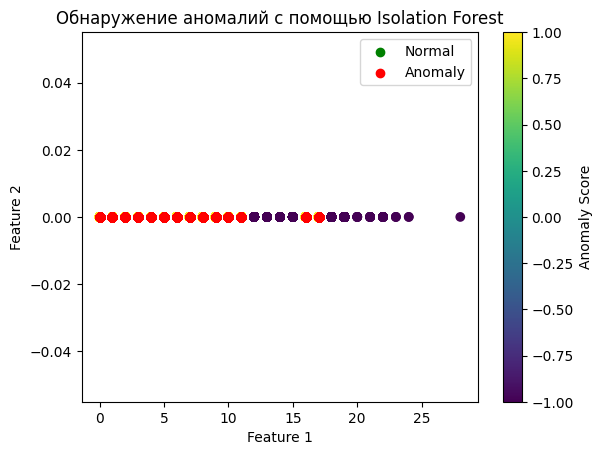

In [19]:
from sklearn.ensemble import IsolationForest
#  Решение задачи поиска аномалий
# Обучение модели обнаружения выбросов
model = IsolationForest(contamination=0.05)  # Указываем ожидаемую долю выбросов
model.fit(X)

# Предсказание аномалий
anomaly_scores = model.decision_function(X)
outliers = model.predict(X)

# Визуализация данных и аномалий
# plt.scatter(X[:,0], [0] * len(X), c=outliers, cmap='viridis')
# plt.colorbar()
# plt.title('Обнаружение аномалий с помощью Isolation Forest')
# plt.show()

plt.scatter(X[:,0], [0] * len(X), c=outliers, cmap='viridis')
plt.colorbar(label='Anomaly Score')

# Добавляем текстовые метки для нормальных и аномальных данных
plt.scatter(X[outliers==0,0], [0] * sum(outliers==0), color='green', label='Normal')
plt.scatter(X[outliers==1,0], [0] * sum(outliers==1), color='red', label='Anomaly')

plt.legend()
plt.title('Обнаружение аномалий с помощью Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##### 7. Визуализация. Создать графики ошибок прогнозирования, метрик качества обученной модели и важности признаков.

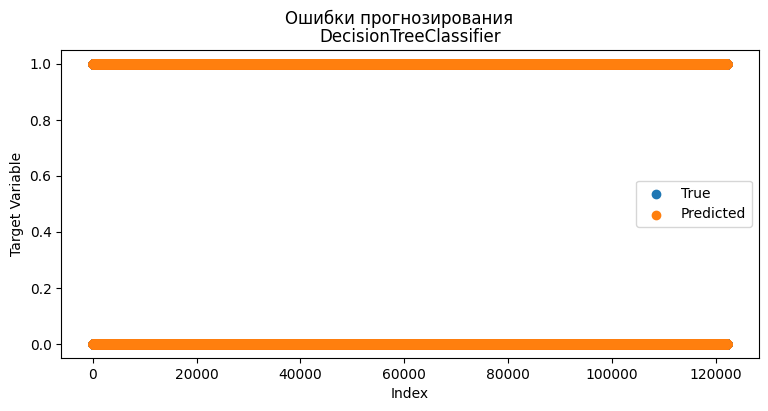

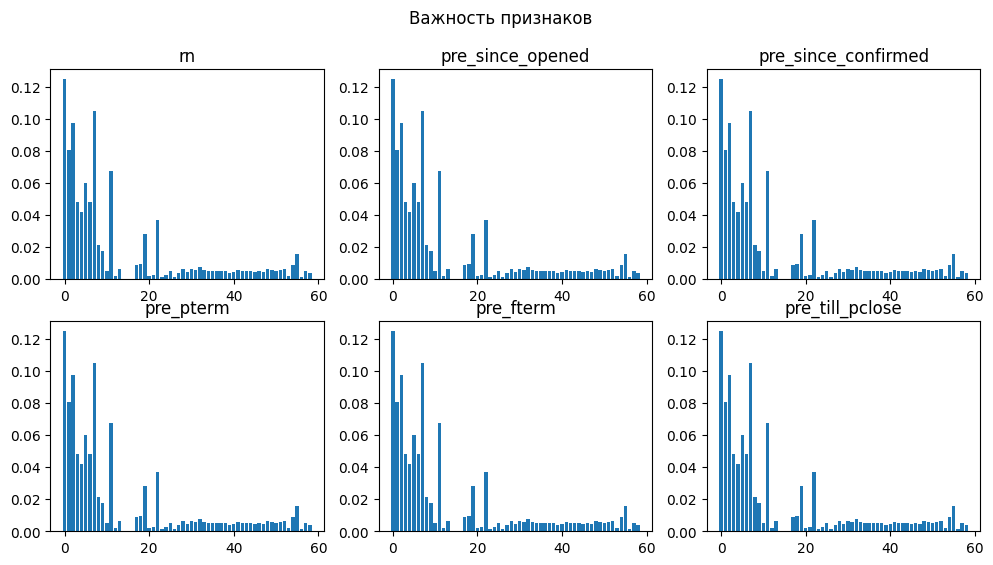

In [44]:
# Визуализация
plt.figure(figsize=(9, 4))

y_pred = model.predict(X_test)
plt.scatter(range(len(y_test)), y_test, label='True')
plt.scatter(range(len(y_test)), y_pred, label='Predicted')
plt.title(f"{type(model).__name__}")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.suptitle("Ошибки прогнозирования")
plt.show()

# Графики важности признаков
plt.figure(figsize=(12,6))
feature_names = list(X_train.columns)
for i in range(6):
    plt.subplot(2, 3, i+1)
    importances = model.feature_importances_
    plt.bar(range(len(importances)), importances)
    plt.title(f"{feature_names[i]}")
plt.suptitle("Важность признаков")
plt.show()

##### Результат выполнения финальной работы размещен в гит репозиторий https://github.com/Igor3407/DS